In [3]:
import numpy as np
import pandas as pd

import seaborn as sns

In [1]:
rating_df = pd.read_csv('data/ratings.csv')

print(rating_df.shape)
rating_df.head(3)

(25000095, 4)


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828


In [2]:
rating_df.rating.describe()

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

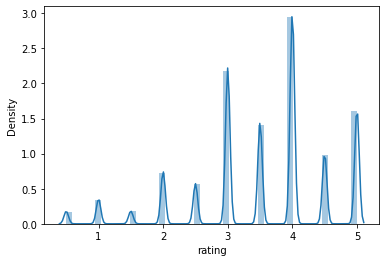

In [4]:
sns.distplot(rating_df.rating);

In [6]:
# 한 유저가 같은 영화에 대해 두 번 이상 평점을 매긴 경우는 존재하지 않는다.
rating_df.groupby(['userId', 'movieId']).size().value_counts()

1    25000095
dtype: int64

In [8]:
# 해당 데이터는 한 유저가 최소 20개에서부터 최대 약 32000개의 영화에 대해 평점을 매긴 데이터이다.
rating_df.groupby('userId')['movieId'].count().sort_values()

userId
56219        20
87801        20
129589       20
57943        20
129586       20
          ...  
20055      7488
33844      7919
137293     8913
80974      9178
72315     32202
Name: movieId, Length: 162541, dtype: int64

### 빈발 패턴 분석도 진행
- 유저별 본 movie list에 대한 데이터프레임을 생성하여 진행
    - 추천 모델이므로 평점을 4점 이상 받은 영화에 대해서만 진행